In [1]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler

In [2]:
origin = read_excel("../../boston.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [3]:
origin.isna().sum()


CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

## 04. 탐색적 데이터 분석
### 명목형 처리

In [4]:
origin['CHAS'] = origin['CHAS'].astype('category')
origin['CAT. MEDV'] = origin['CAT. MEDV'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   INDUS      506 non-null    float64 
 3   CHAS       506 non-null    category
 4   NOX        506 non-null    float64 
 5   RM         506 non-null    float64 
 6   AGE        506 non-null    float64 
 7   DIS        506 non-null    float64 
 8   RAD        506 non-null    int64   
 9   TAX        506 non-null    int64   
 10  PTRATIO    506 non-null    float64 
 11  B          506 non-null    float64 
 12  LSTAT      506 non-null    float64 
 13  MEDV       506 non-null    float64 
 14  CAT. MEDV  506 non-null    category
dtypes: category(2), float64(11), int64(2)
memory usage: 52.7 KB


### 기본통계 확인

In [5]:
origin.describe()


CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.653063   
std      2.105710    8.707259  168.537116    2.164946   91.294864    7.141062   
min      1.129600    1.000000  187.000000   12.600000    0.320000    1.730000   
25%      2.100175    4.000000  279.000000   17.400000  375.377500    6.950000   
50%      3.207450    5.000000  330.000000   19.050000  391.440000   11.360000   
75%      5.188425   24.000000  666.000000   20.200000  396.225000   16.955000   
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   

             MEDV  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### 상자그림

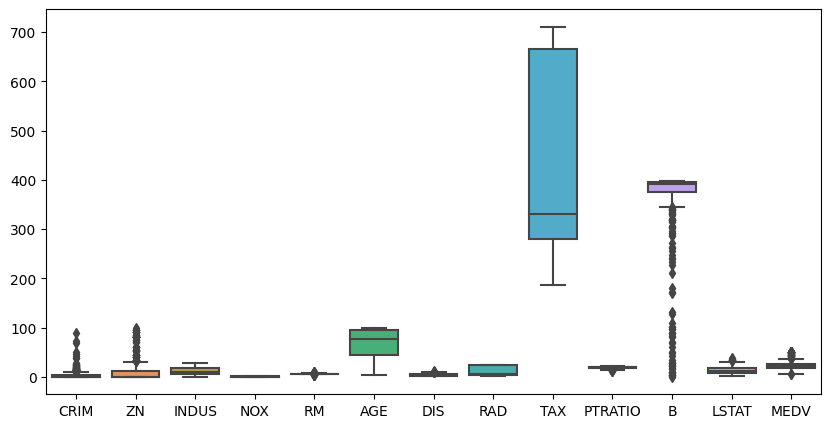

In [6]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

### 산점도 그래프와 추세선 확인

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

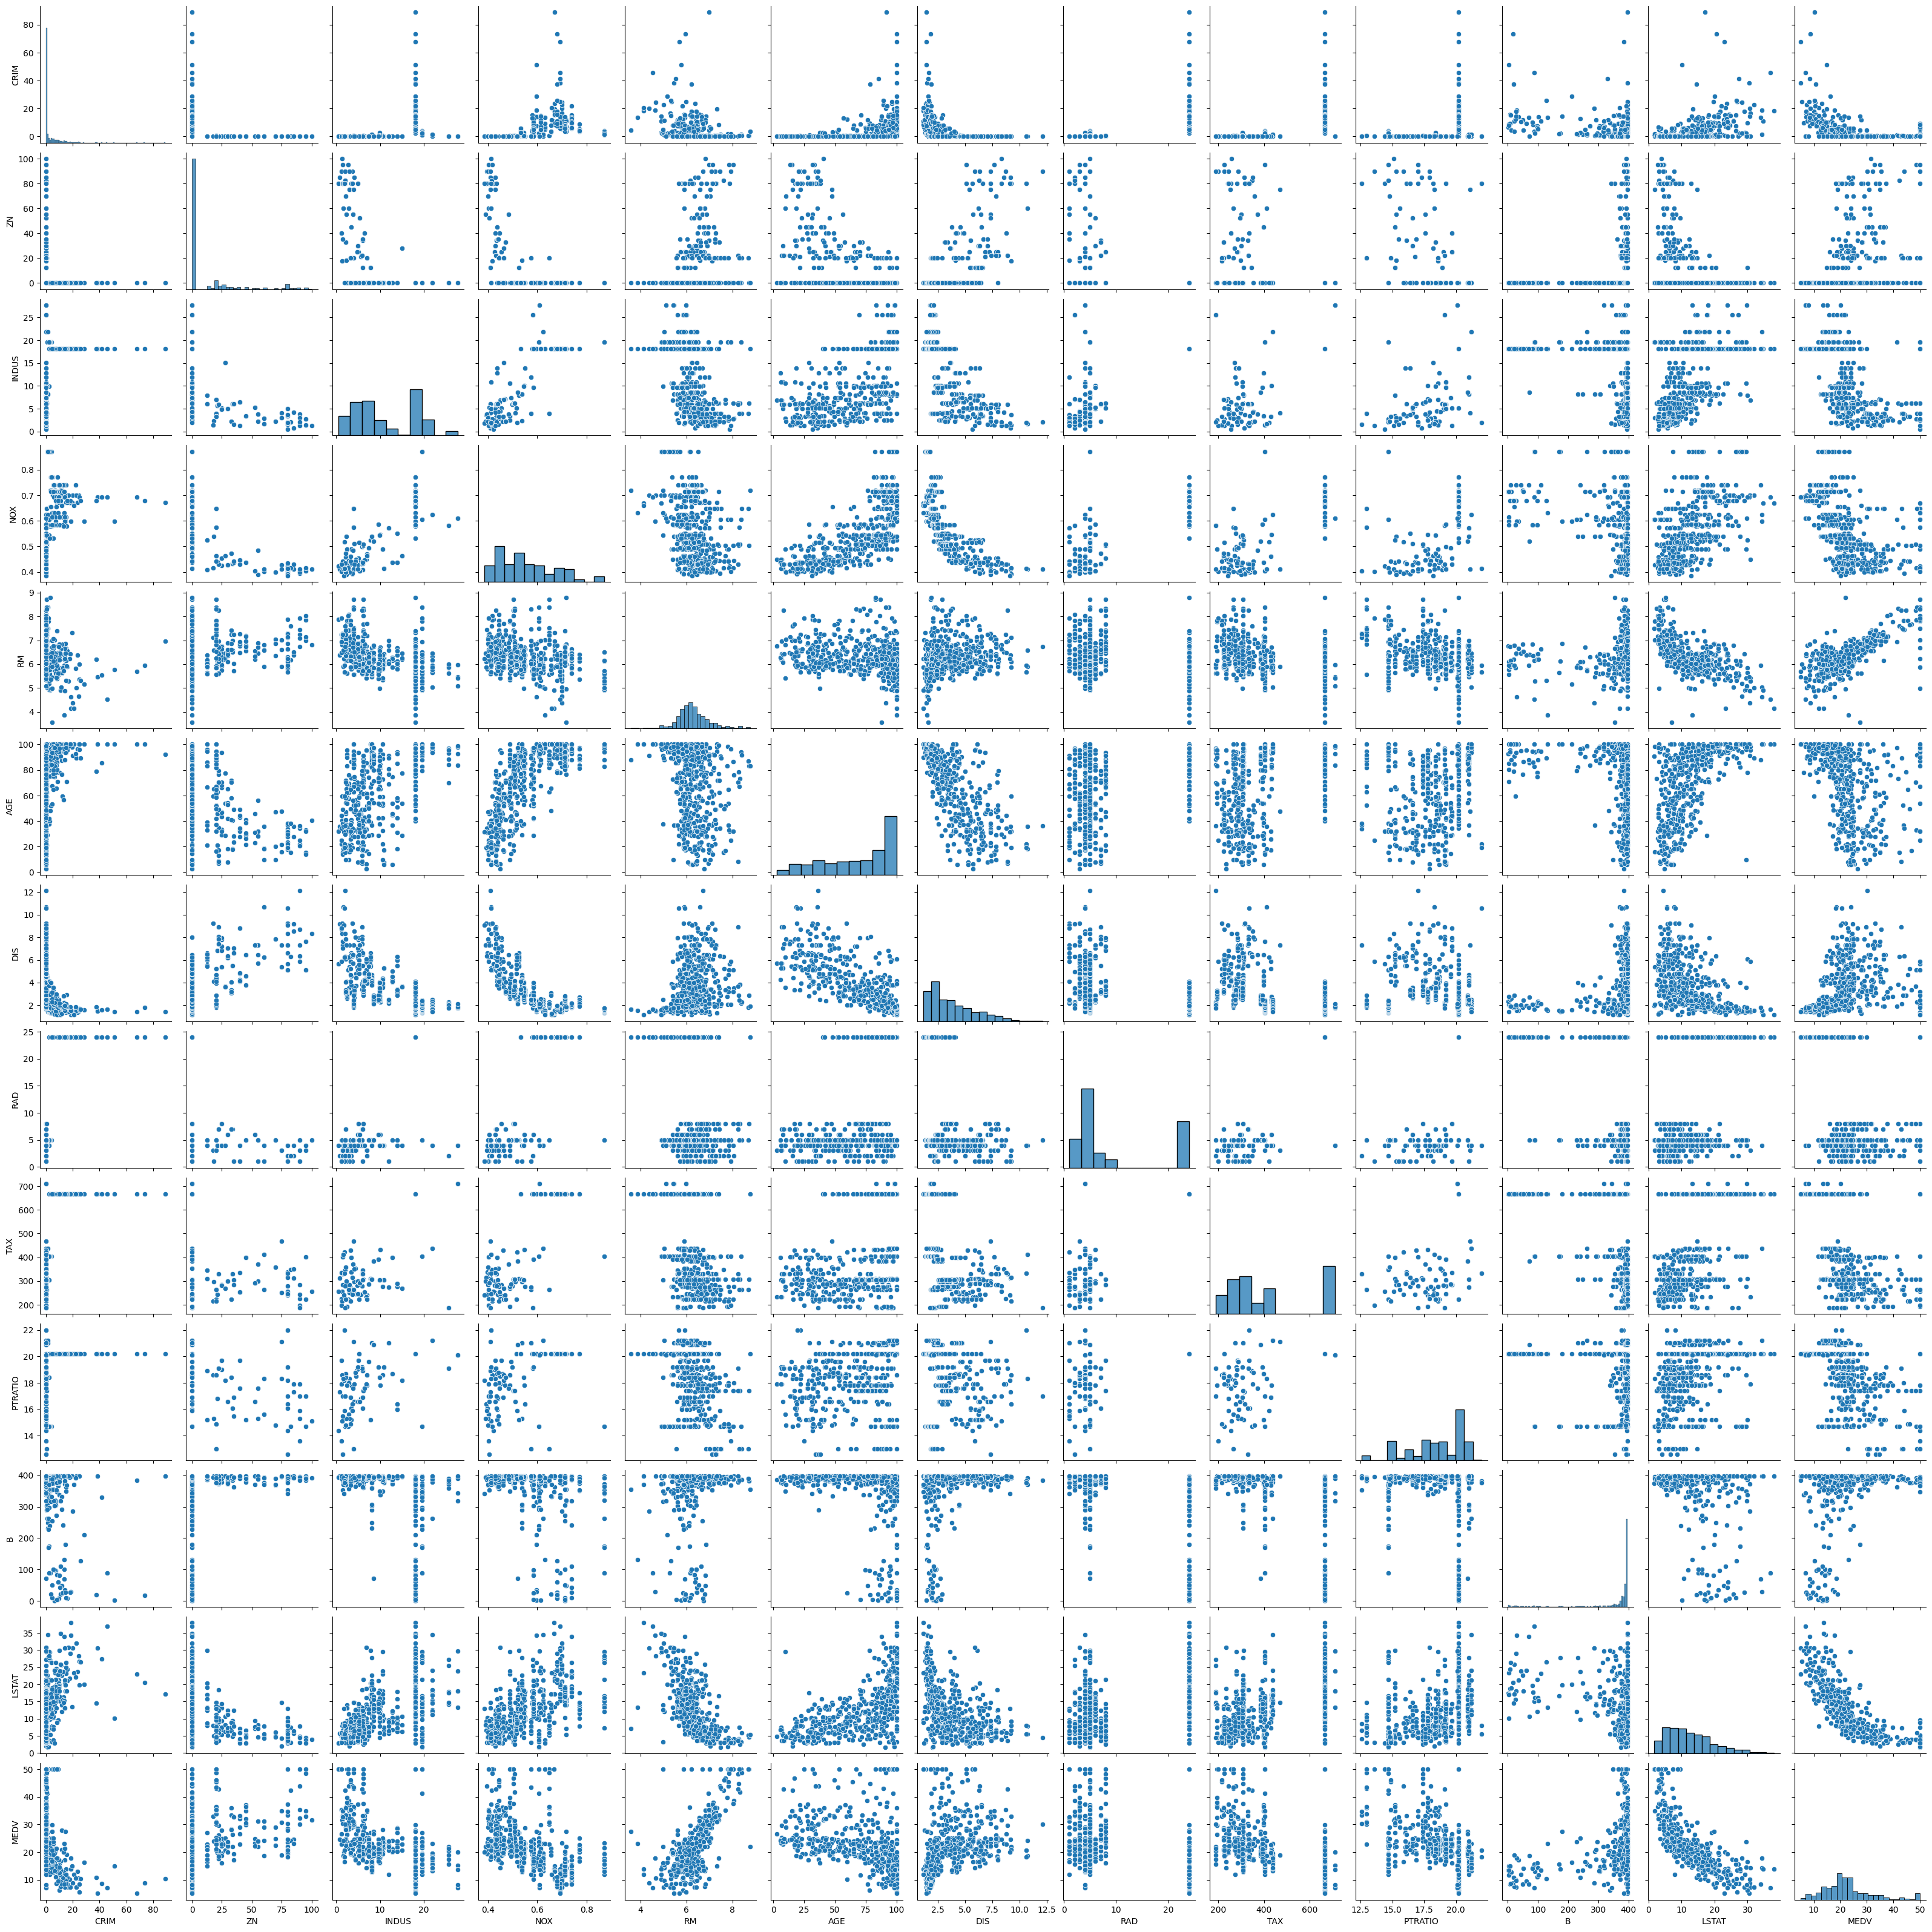

In [7]:
plt.figure(figsize=(30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

### 상관계수 확인


In [8]:
corr = origin.drop('MEDV', axis=1).corr()
corr


CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN        -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS      0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX        0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM        -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS       -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD        0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO    0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
B         -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069   
LSTAT      0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
CAT. MEDV -0.151987  0.365296 -0.366276  0.108631 -0.232502  0.641265   

                AGE       DIS       RAD       TAX   PTRATIO         B  \
CRIM       0.352734 -0.379670  0.625505  0.582764  0.289946 -0.385064   
ZN        -0.569537  0.664408 -0.311948 -0.314563 -0.391679  0.175520   
INDUS      0.644779 -0.708027  0.595129  0.720760  0.383248 -0.356977   
CHAS       0.086518 -0.099176 -0.007368 -0.035587 -0.121515  0.048788   
NOX        0.731470 -0.769230  0.611441  0.668023  0.188933 -0.380051   
RM        -0.240265  0.205246 -0.209847 -0.292048 -0.355501  0.128069   
AGE        1.000000 -0.747881  0.456022  0.506456  0.261515 -0.273534   
DIS       -0.747881  1.000000 -0.494588 -0.534432 -0.232471  0.291512   
RAD        0.456022 -0.494588  1.000000  0.910228  0.464741 -0.444413   
TAX        0.506456 -0.534432  0.910228  1.000000  0.460853 -0.441808   
PTRATIO    0.261515 -0.232471  0.464741  0.460853  1.000000 -0.177383   
B         -0.273534  0.291512 -0.444413 -0.441808 -0.177383  1.000000   
LSTAT      0.602339 -0.496996  0.488676  0.543993  0.374044 -0.366087   
CAT. MEDV -0.191196  0.118887 -0.197924 -0.273687 -0.443425  0.155137   

              LSTAT  CAT. MEDV  
CRIM       0.455621  -0.151987  
ZN        -0.412995   0.365296  
INDUS      0.603800  -0.366276  
CHAS      -0.053929   0.108631  
NOX        0.590879  -0.232502  
RM        -0.613808   0.641265  
AGE        0.602339  -0.191196  
DIS       -0.496996   0.118887  
RAD        0.488676  -0.197924  
TAX        0.543993  -0.273687  
PTRATIO    0.374044  -0.443425  
B         -0.366087   0.155137  
LSTAT      1.000000  -0.469911  
CAT. MEDV -0.469911   1.000000

### 상관계수 히트맵

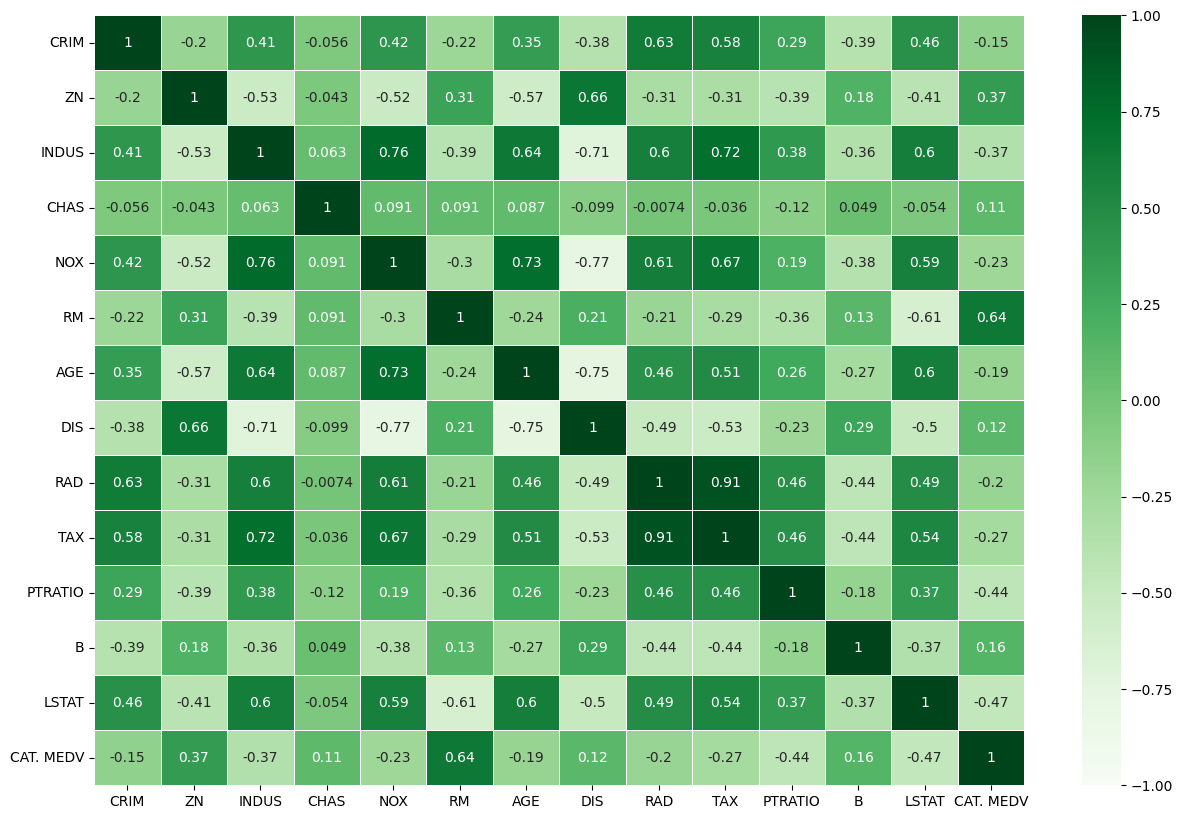

In [9]:
plt.figure(figsize=(15, 10))
sb.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax = 1, linewidths = .5) # annot = False 셀 전부 빈칸
plt.show()
plt.close()

제외하기로 한 독립변수 제거
> 상관계수의 절대값이 0.7이상인 항목을 순차적으로 제거하여 회귀분석에 사용할 요인을 선정 (다중 공산성 제거)

In [10]:
x = origin.drop(['TAX','DIS', 'NOX','INDUS'], axis=1)
x


CRIM    ZN CHAS     RM   AGE  RAD  PTRATIO       B  LSTAT  MEDV  \
0    0.00632  18.0    0  6.575  65.2    1     15.3  396.90   4.98  24.0   
1    0.02731   0.0    0  6.421  78.9    2     17.8  396.90   9.14  21.6   
2    0.02729   0.0    0  7.185  61.1    2     17.8  392.83   4.03  34.7   
3    0.03237   0.0    0  6.998  45.8    3     18.7  394.63   2.94  33.4   
4    0.06905   0.0    0  7.147  54.2    3     18.7  396.90   5.33  36.2   
..       ...   ...  ...    ...   ...  ...      ...     ...    ...   ...   
501  0.06263   0.0    0  6.593  69.1    1     21.0  391.99   9.67  22.4   
502  0.04527   0.0    0  6.120  76.7    1     21.0  396.90   9.08  20.6   
503  0.06076   0.0    0  6.976  91.0    1     21.0  396.90   5.64  23.9   
504  0.10959   0.0    0  6.794  89.3    1     21.0  393.45   6.48  22.0   
505  0.04741   0.0    0  6.030  80.8    1     21.0  396.90   7.88  11.9   

    CAT. MEDV  
0           0  
1           0  
2           1  
3           1  
4           1  
..        ...  
501         0  
502         0  
503         0  
504         0  
505         0  

[506 rows x 11 columns]

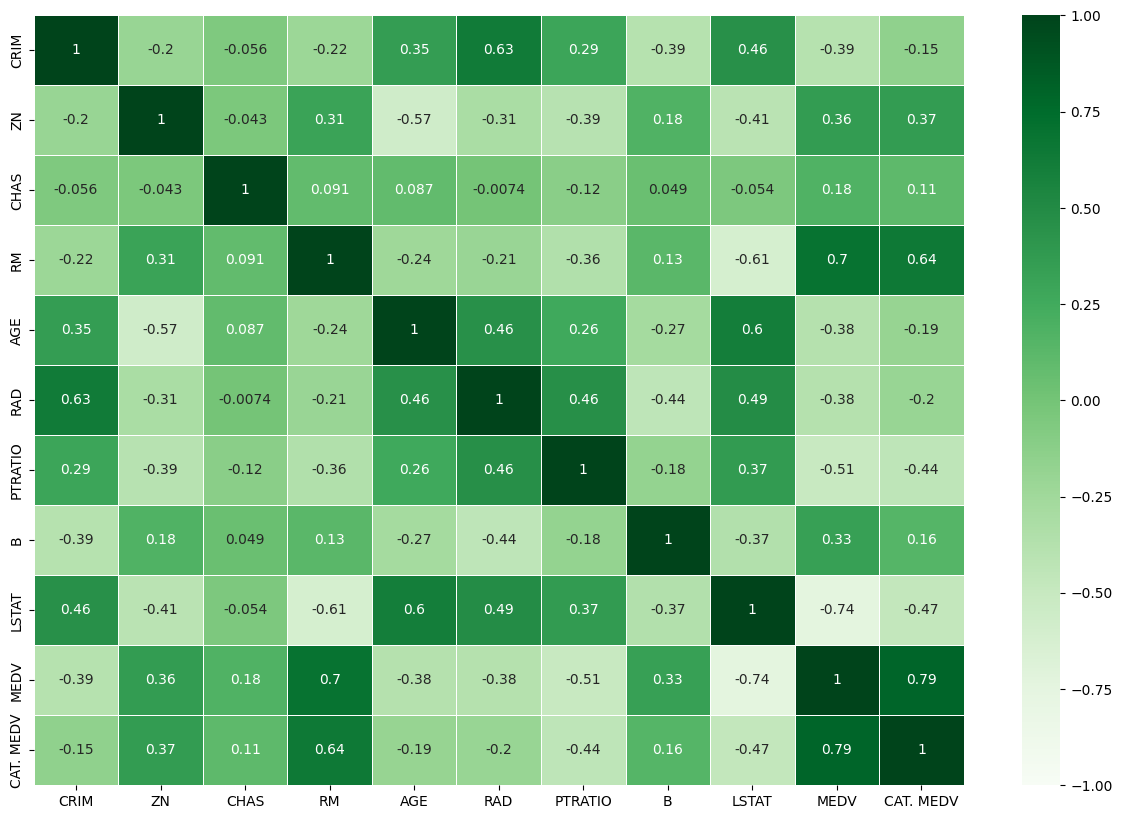

In [11]:
plt.figure(figsize=(15, 10))
sb.heatmap(x.corr(), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()


In [12]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   CHAS       506 non-null    category
 3   RM         506 non-null    float64 
 4   AGE        506 non-null    float64 
 5   RAD        506 non-null    int64   
 6   PTRATIO    506 non-null    float64 
 7   B          506 non-null    float64 
 8   LSTAT      506 non-null    float64 
 9   MEDV       506 non-null    float64 
 10  CAT. MEDV  506 non-null    category
dtypes: category(2), float64(8), int64(1)
memory usage: 36.9 KB


In [13]:

categorical_df = x.filter(['CHAS', 'CAT. MEDV'])
categorical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CHAS       506 non-null    category
 1   CAT. MEDV  506 non-null    category
dtypes: category(2)
memory usage: 1.4 KB


In [14]:
y = x['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
x.drop(['CHAS', 'CAT. MEDV', 'MEDV'], axis=1, inplace=True)
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   RAD      506 non-null    int64  
 5   PTRATIO  506 non-null    float64
 6   B        506 non-null    float64
 7   LSTAT    506 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.8 KB


c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

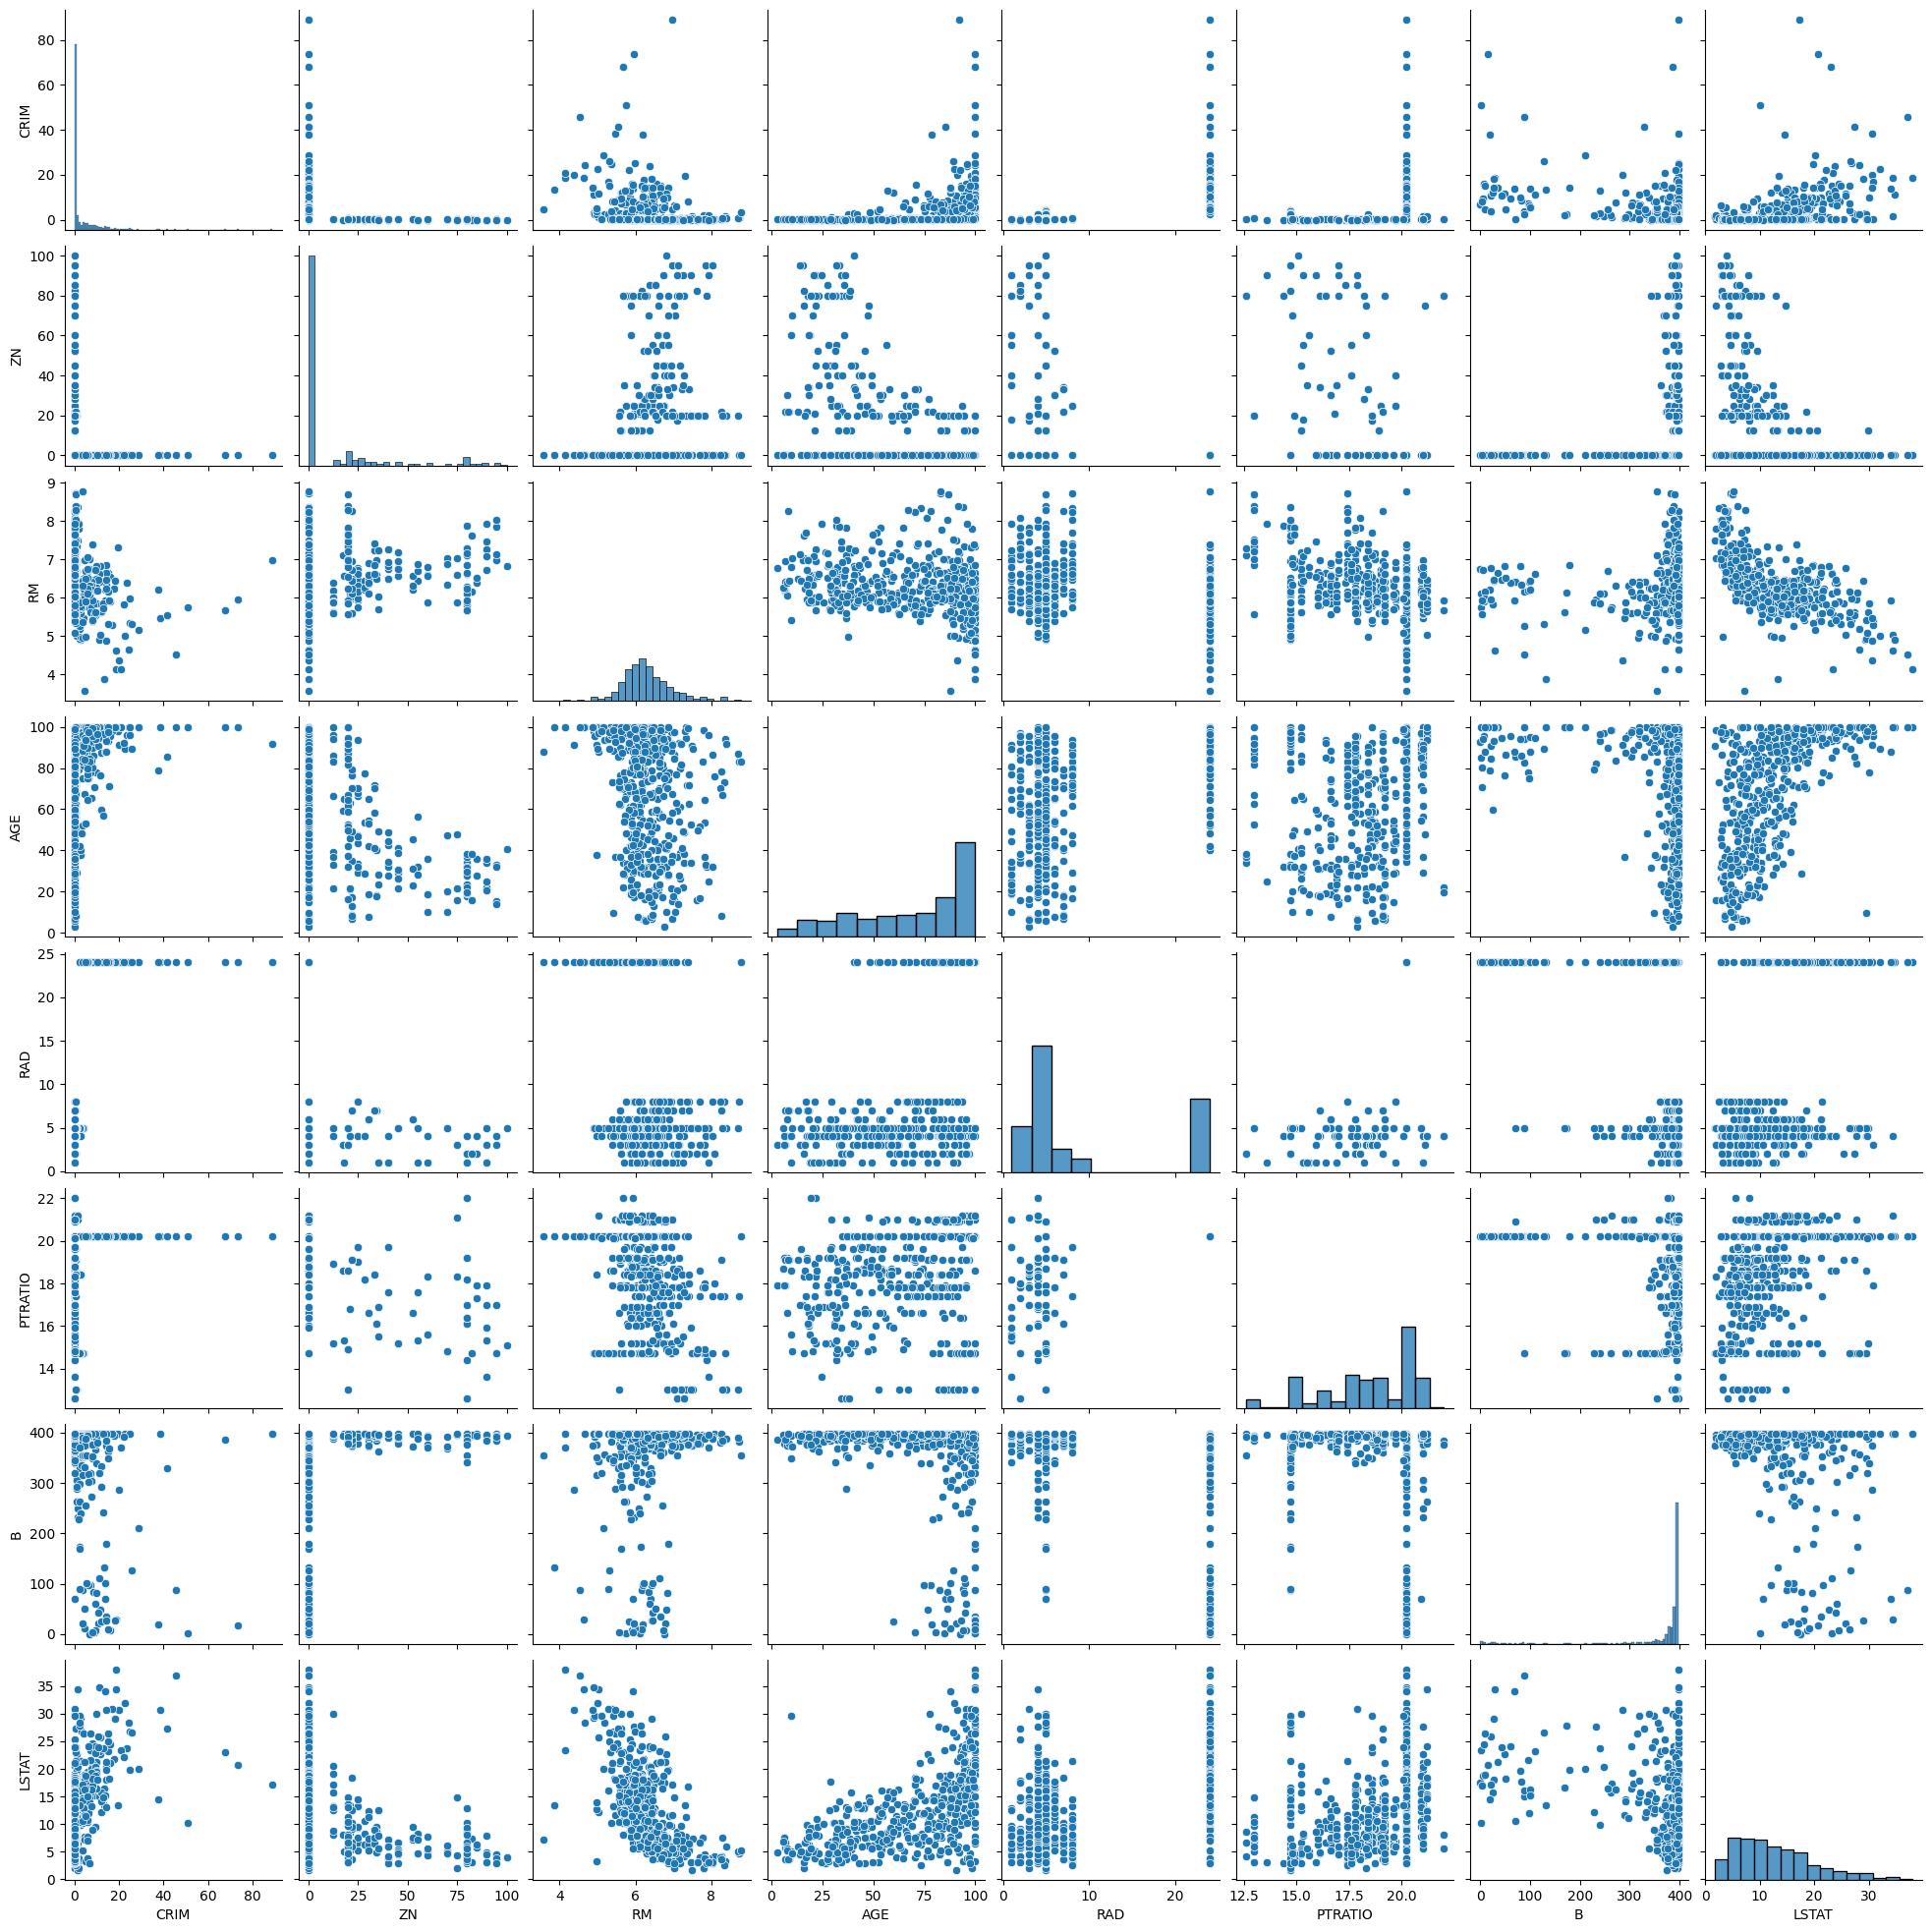

In [16]:
plt.figure(figsize=(30, 30))
sb.pairplot(x)
plt.show()
plt.savefig("pairplot.png")
plt.close()


In [17]:
np.random.seed(777)


In [18]:

x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
x_scale


array([[-0.41978194,  0.28482986,  0.41367189, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236,  0.19427445, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236,  1.28271368, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.98496002, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.72567214, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236, -0.36276709, ...,  1.17646583,
         0.44105193, -0.66905833]])

### 분리해 놓은 명목형 데이터와 결합
- 명목형 변수의 값이 0, 1 두 종류밖에 없기 때문에 별도로 더미변수 처리는 필요 없다.
- 표준화의 결과와 병합이 필요하지만 표준화 함수는 리턴타입이 numpy array이므로 이를 다시 DataFrame으로 변환해야만 명목형과 결합이 가능하다.


In [19]:
x_scale_df  = DataFrame(x_scale, columns = x.columns)
x_scale_df

CRIM        ZN        RM       AGE       RAD   PTRATIO         B  \
0   -0.419782  0.284830  0.413672 -0.120013 -0.982843 -1.459000  0.441052   
1   -0.417339 -0.487722  0.194274  0.367166 -0.867883 -0.303094  0.441052   
2   -0.417342 -0.487722  1.282714 -0.265812 -0.867883 -0.303094  0.396427   
3   -0.416750 -0.487722  1.016303 -0.809889 -0.752922  0.113032  0.416163   
4   -0.412482 -0.487722  1.228577 -0.511180 -0.752922  0.113032  0.441052   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.439316  0.018673 -0.982843  1.176466  0.387217   
502 -0.415249 -0.487722 -0.234548  0.288933 -0.982843  1.176466  0.441052   
503 -0.413447 -0.487722  0.984960  0.797449 -0.982843  1.176466  0.441052   
504 -0.407764 -0.487722  0.725672  0.736996 -0.982843  1.176466  0.403225   
505 -0.415000 -0.487722 -0.362767  0.434732 -0.982843  1.176466  0.441052   

        LSTAT  
0   -1.075562  
1   -0.492439  
2   -1.208727  
3   -1.361517  
4   -1.026501  
..        ...  
501 -0.418147  
502 -0.500850  
503 -0.983048  
504 -0.865302  
505 -0.669058  

[506 rows x 8 columns]

In [20]:
x_df = merge(x_scale_df, categorical_df, left_index=True, right_index=True)
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   RM         506 non-null    float64 
 3   AGE        506 non-null    float64 
 4   RAD        506 non-null    float64 
 5   PTRATIO    506 non-null    float64 
 6   B          506 non-null    float64 
 7   LSTAT      506 non-null    float64 
 8   CHAS       506 non-null    category
 9   CAT. MEDV  506 non-null    category
dtypes: category(2), float64(8)
memory usage: 33.0 KB


#### 훈련 데이터와 검증 데이터로 분할

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 10), (152, 10), (354,), (152,))

In [22]:
model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (len(x_train.columns), )))
model.add(Dense(32, activation = 'relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [23]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.001, verbose=1)
])


Epoch 1/500
12/12 [==============================] - 1s 23ms/step - loss: 586.5612 - mae: 22.3725 - val_loss: 555.4188 - val_mae: 21.6732 - lr: 0.0010
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 554.7490 - mae: 21.6962 - val_loss: 524.4267 - val_mae: 20.9879 - lr: 0.0010
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 521.8510 - mae: 20.9633 - val_loss: 489.1188 - val_mae: 20.1791 - lr: 0.0010
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 481.5122 - mae: 20.0633 - val_loss: 444.7587 - val_mae: 19.1390 - lr: 0.0010
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 431.1723 - mae: 18.8949 - val_loss: 388.1143 - val_mae: 17.7564 - lr: 0.0010
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 366.6116 - mae: 17.3199 - val_loss: 319.4829 - val_mae: 15.9711 - lr: 0.0010
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 291.2549 - mae: 15.3166 - 

### 07. 학습 결과 평가

In [24]:
# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df


loss        mae    val_loss    val_mae     lr
epochs                                                     
1       586.561157  22.372549  555.418762  21.673223  0.001
2       554.749023  21.696224  524.426697  20.987867  0.001
3       521.851013  20.963257  489.118835  20.179102  0.001
4       481.512238  20.063282  444.758698  19.139032  0.001
5       431.172272  18.894943  388.114319  17.756441  0.001
...            ...        ...         ...        ...    ...
172       6.962434   1.973293   11.104062   2.503729  0.001
173       6.541079   1.882914   10.738949   2.449205  0.001
174       6.372531   1.834682   10.443032   2.440313  0.001
175       6.336721   1.830823   10.379341   2.413879  0.001
176       6.249894   1.819453   10.497763   2.424018  0.001

[176 rows x 5 columns]

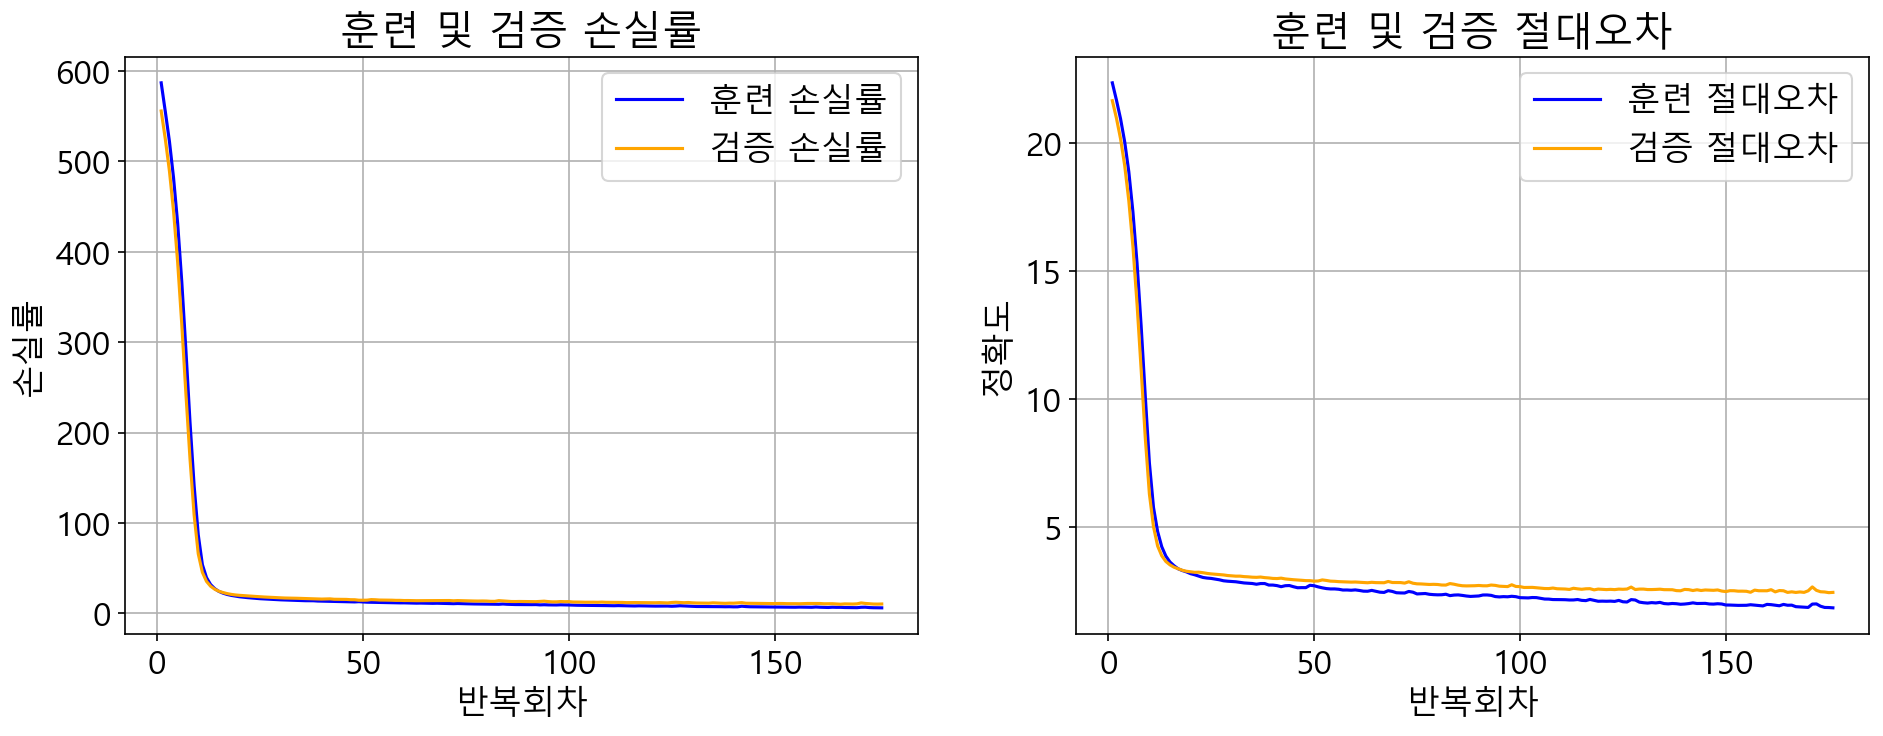

In [25]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()


In [26]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

12/12 [==============================] - 0s 1ms/step - loss: 6.1805 - mae: 1.8081
최종 훈련 손실률: 6.180550, 최종 훈련 절대오차: 1.808056
5/5 [==============================] - 0s 1ms/step - loss: 10.4978 - mae: 2.4240
최종 검증 손실률: 10.497763, 최종 검증 절대오차: 2.424018


### 08. 학습 결과 적용
####  테스트 데이터에 대한 예측 결과 산정

In [27]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


5/5 [==============================] - 0s 2ms/step


#### 결과 데이터 셋 구성

In [28]:
train_df = DataFrame(x_train, columns=x_train.columns)
train_df['관측치'] = y_train.values
train_df['예측치'] = train_pred.flatten()

train_df['훈련오차'] = train_df['관측치']-train_df['예측치']

train_df.head()

CRIM        ZN        RM       AGE       RAD   PTRATIO         B  \
372  0.541569 -0.487722 -0.583589  0.747665  1.661245  0.806576 -0.096421   
18  -0.327103 -0.487722 -1.180521 -1.137046 -0.637962  1.176466 -0.742112   
185 -0.413480 -0.487722 -0.187534  0.008005 -0.752922 -0.303094  0.333711   
57  -0.418851  3.804234  0.757015 -0.998360 -0.523001 -1.551473  0.397194   
261 -0.358360  0.370669  1.759974  0.740552 -0.523001 -2.522434  0.347526   

        LSTAT CHAS CAT. MEDV   관측치        예측치      훈련오차  
372 -0.528885    1         1  50.0  40.709671  9.290329  
18  -0.134996    0         0  20.2  19.138348  1.061652  
185  0.069658    0         0  29.6  21.282290  8.317710  
57  -1.219941    0         1  31.6  31.850988 -0.250988  
261 -0.755966    0         1  43.1  40.385956  2.714044

In [29]:
test_df = DataFrame(x_test, columns=x_train.columns)
test_df['관측치'] = y_test.values
test_df['예측치'] = test_pred.flatten()

test_df['훈련오차'] = test_df['관측치']-test_df['예측치']

test_df.head()

CRIM        ZN        RM       AGE       RAD   PTRATIO         B  \
207 -0.391193 -0.487722 -0.714658  0.146691 -0.637962  0.066796  0.359148   
425  1.425197 -0.487722 -0.553671  0.953916  1.661245  0.806576 -3.826496   
408  0.441097 -0.487722 -0.951151  1.042817  1.661245  0.806576 -0.460876   
63  -0.405796  0.585267  0.680083 -0.895234 -0.178120  0.575395  0.426579   
290 -0.416442  2.945843  0.821124 -1.446423 -0.637962  0.344213  0.441052   

        LSTAT CHAS CAT. MEDV   관측치        예측치      훈련오차  
207  0.757911    0         0  22.5  19.800583  2.699417  
425  1.645211    0         0   8.3  10.893230 -2.593230  
408  1.926960    0         0  17.2  10.391295  6.808705  
63  -0.441977    0         0  25.0  23.458023  1.541977  
290 -1.306849    0         0  28.5  29.157925 -0.657925

In [34]:
def getTrend(x, y, degree=2, value_count=100):
    #[ a, b, c ] ==> ax^2 + bx + c
    coeff = np.polyfit(x, y, degree)
    
    if type(x) == 'list':
        minx = min(x)
        maxx = max(x)
    else:
        minx = x.min()
        maxx = x.max()
        
    Vtrend = np.linspace(minx, maxx, value_count)
    
    Ttrend = coeff[-1]
    for i in range(0, degree):
        Ttrend += coeff[i] * Vtrend ** (degree - i)
        
    return (Vtrend, Ttrend)
def regplot(x_left, y_left, y_left_pred= None, left_title = None, x_right = None, y_right = None, y_right_pred = None, right_title = None, figsize = (10,5)):
    subcount = 1 if x_right is None else 2

    fig, ax = plt.subplots(1, subcount, figsize = figsize)

    axmain = ax if subcount == 1 else ax[0]

    # 왼쪽 산점도
    sb.scatterplot(x = x_left, y = y_left, label ='data', ax = axmain)

    # 왼쪽 추세선
    x, y = getTrend(x_left, y_left)
    sb.lineplot(x=x, y=y, color = 'blue', linestyle = "--", ax = axmain)

    if y_left_pred is not None:
        sb.scatterplot(x = x_left, y = y_left_pred, label = 'predict', ax = axmain)
        x, y = getTrend(x_left, y_left_pred)
        sb.lineplot( x = x, y = y, color = 'red', linestyle = "--", ax = axmain)

    if left_title is not None:
        axmain.set_title(left_title)

    axmain.legend()
    axmain.grid()

    if x_right is not None:
        # 오른쪽 산점도
        sb.scatterplot(x = x_right,  y = y_right, label = 'data', ax = ax[1])

        # 오른쪽 추세선
        x, y = getTrend(x_right, y_right)
        sb.lineplot(x = x, y=y, color = 'blue', linestyle = '--', ax = ax[1])

        if y_right_pred is not None:
            sb.scatterplot(x = x_right, y= y_right_pred, label = 'predict' , ax=ax[1])
            # 추정치에 대한 추세선
            x, y = getTrend(x_right, y_right_pred)
            sb.lineplot(x = x, y = y, color = 'red', linestyle = "--", ax = ax[1])
        
        if right_title is not None:
            ax[1].set_title(right_title)

        ax[1].legend()
        ax[1].grid()
        
    plt.show()
    plt.close()            

    

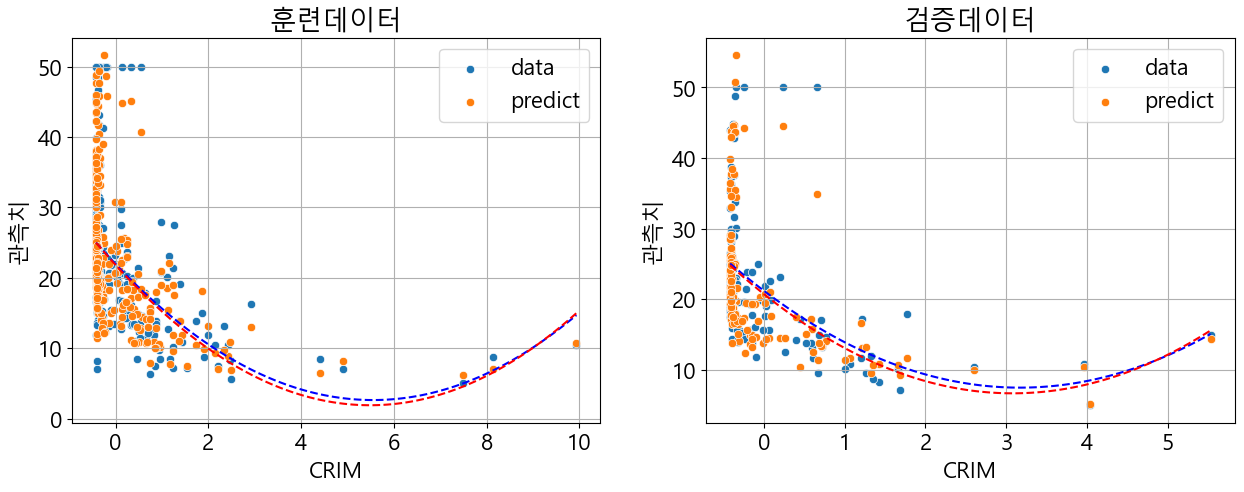

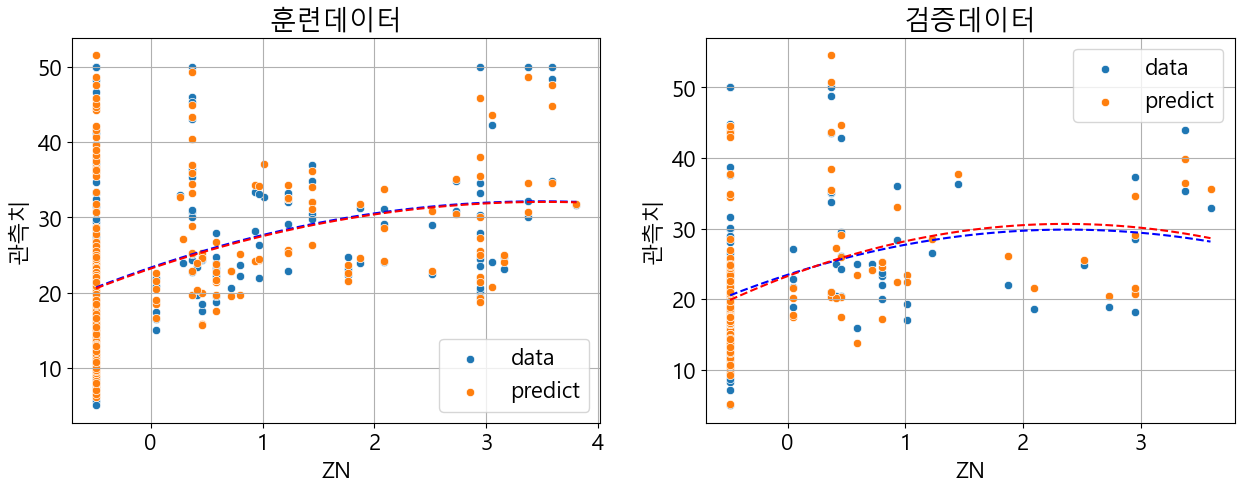

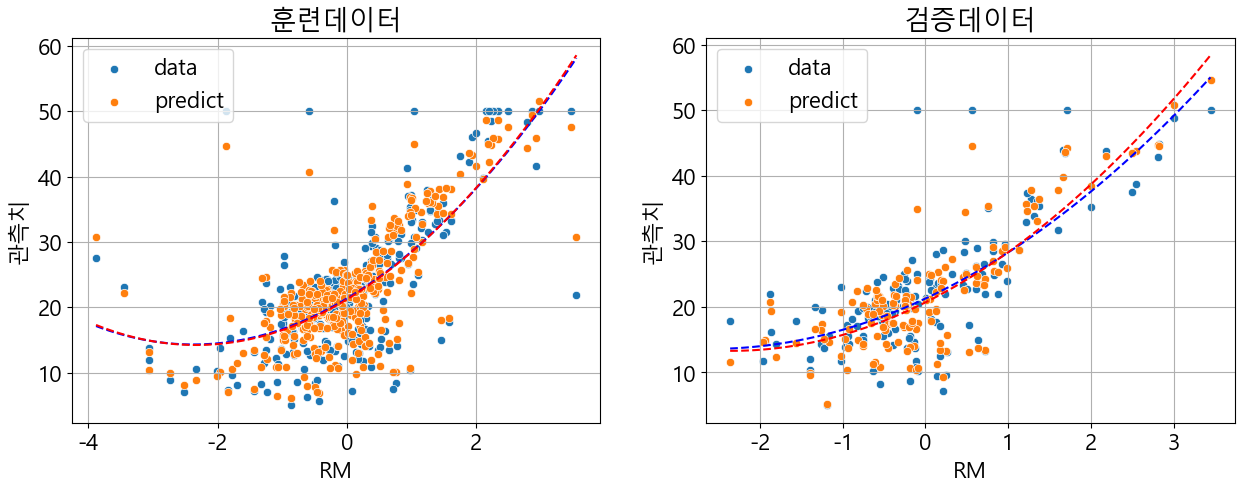

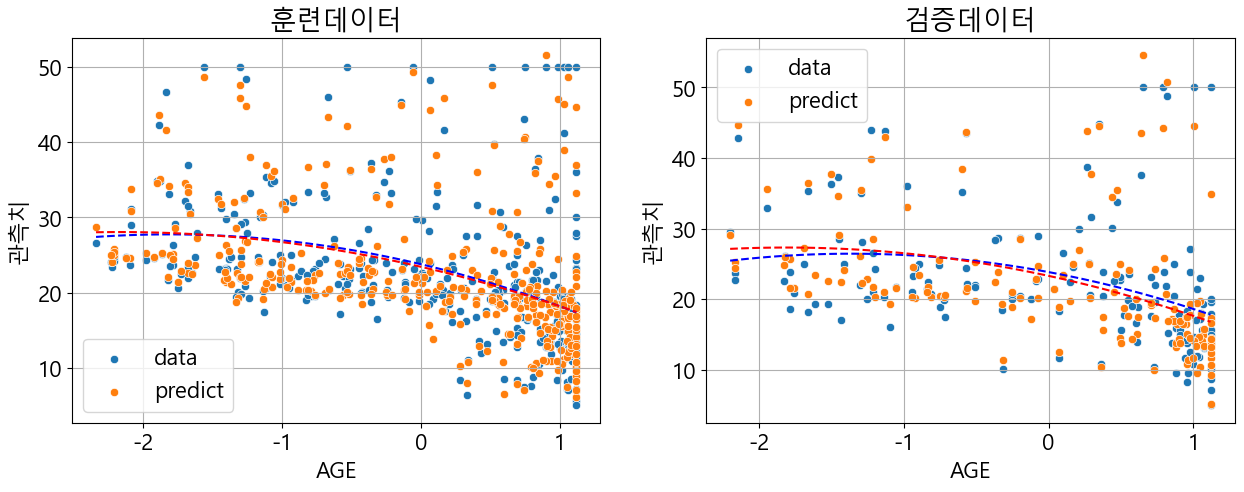

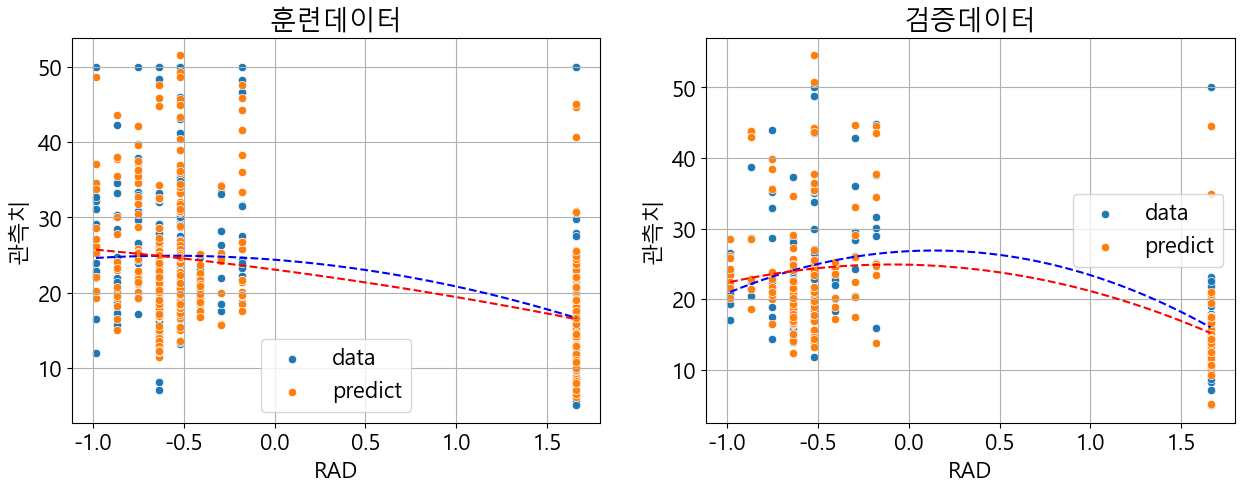

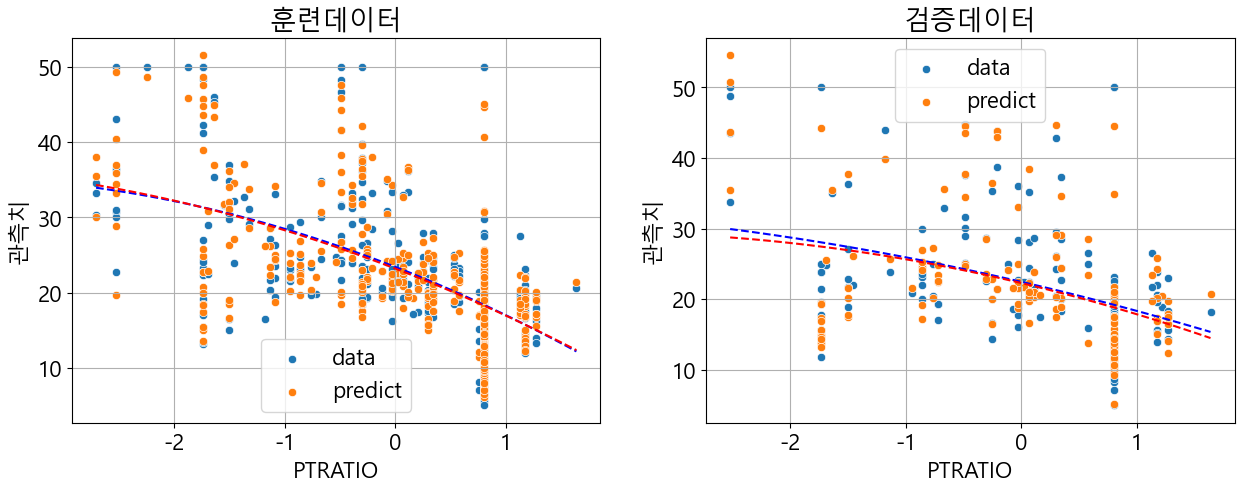

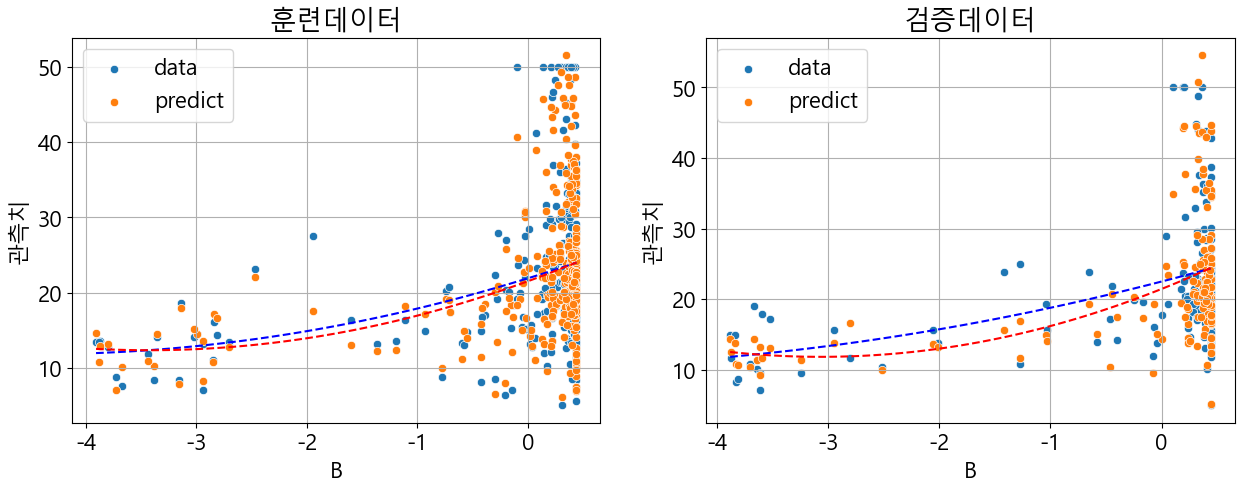

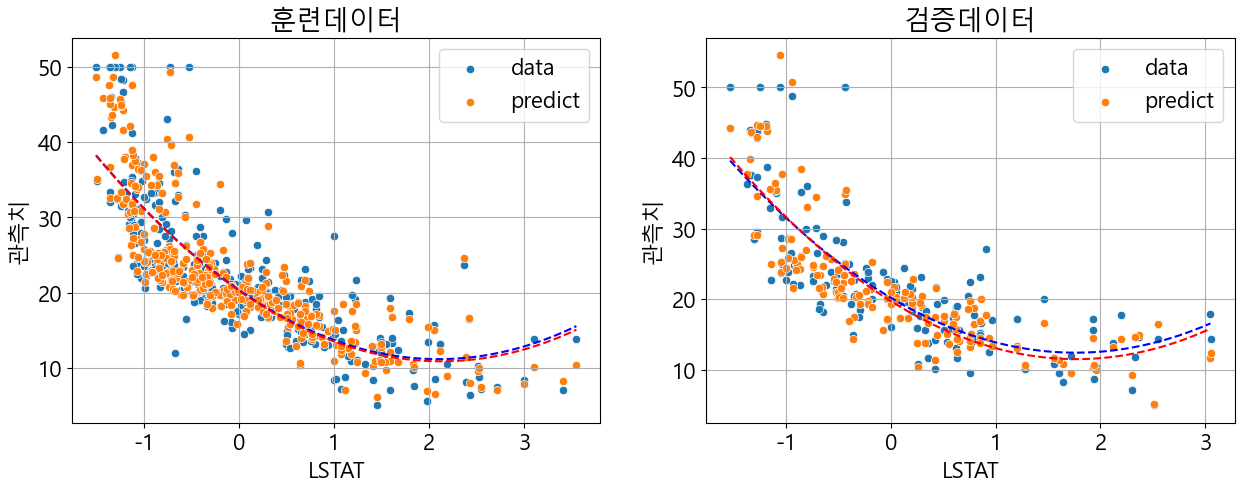

In [35]:
for key in ['CRIM','ZN','RM','AGE','RAD','PTRATIO','B','LSTAT']:
    regplot(train_df[key], train_df['관측치'], train_df['예측치'], "훈련데이터",
                   test_df[key], test_df['관측치'], test_df['예측치'], "검증데이터",
                   figsize=(15, 5))